In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('data2.csv')
data.head(10)


,V_ADC (V),Masa (g),Masa medida
0,0.20901,0.00,0
1,0.22433,185.00,188
2,0.26222,648.00,663
3,0.26633,703.00,714
4,0.26610,701.00,711
5,0.21542,74.00,77
6,0.22446,189.00,190
7,0.32360,1408.00,1431
8,0.37690,2067.00,2099
9,0.20985,7.09,7


In [4]:
x = np.array(data[['Masa (g)']])
y = np.array(data[['V_ADC (V)']])

data_scr = data.drop(range(0,9), axis=0)
print(data_scr.head())

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values
y_pred = model.predict(x)

# Now With the screws

# Filter the data for screws
x_scr = np.array(data_scr[['Masa (g)']])
y_scr = np.array(data_scr[['V_ADC (V)']])

# Fit a linear regression model for the screws
model_scr = LinearRegression()
model_scr.fit(x_scr, y_scr)

# Predict y values for the screws
y_pred_scr = model_scr.predict(x_scr)

r2 = r2_score(y, y_pred)
r2_scr = r2_score(y_scr, y_pred_scr)
mse = mean_squared_error(y, y_pred)
mse_scr = mean_squared_error(y_scr, y_pred_scr)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
slope_scr = model_scr.coef_[0][0]
intercept_scr = model_scr.intercept_[0]

    V_ADC (V)  Masa (g)  Masa medida
9     0.20985      7.09            7
10    0.21057     14.18           16
11    0.21115     21.26           23
12    0.21145     28.35           27
13    0.21170     35.42           35


In [ ]:
fig, ax = plt.subplots(2, figsize=(12, 6), layout='constrained')

ax[0].scatter(x, y, color='blue', label='Data')
ax[0].plot(x, y_pred, color='red', ls='--', label='Prediction')  
ax[0].set_xlabel('Masa (g)')
ax[0].set_ylabel('Voltaje (V)')
ax[0].set_title('Voltage vs Mass')
ax[0].legend()
ax[0].grid()

ax[1].scatter(x_scr, y_scr, color='blue', label='Data')
ax[1].plot(x_scr, y_pred_scr, color='red', ls='--', label='Prediction')  
ax[1].set_xlabel('Masa (g)')
ax[1].set_ylabel('Voltaje (V)')
ax[1].set_title('Voltage vs Mass (Only Screws)')
ax[1].legend()
ax[1].grid()

ax[0].text(500, 0.350, f'R² = {"{:.6f}".format(r2)}', fontsize=12)
ax[0].text(500, 0.325, f'slp = {"{:.5E}".format(slope.item(), ".5E")}', fontsize=12)
ax[0].text(500, 0.300, f'int = {"{:.5E}".format(intercept, ".5E")}', fontsize=12)

ax[1].text(20, 0.216, f'R² = {"{:.6f}".format(r2_scr)}', fontsize=12)
ax[1].text(20, 0.215, f'slp = {"{:.5E}".format(slope_scr.item())}', fontsize=12)
ax[1].text(20, 0.214, f'int = {"{:.5E}".format(intercept_scr)}', fontsize=12)

plt.show()


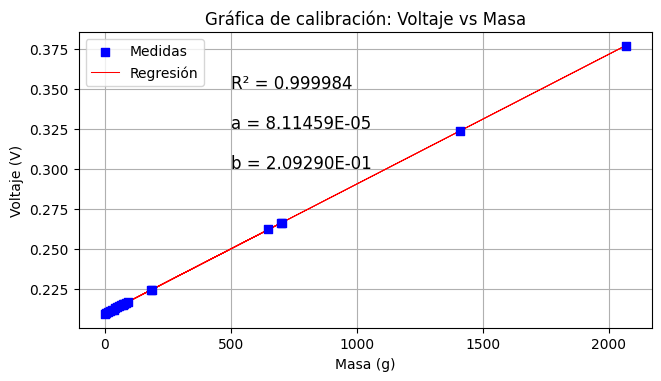

In [26]:
fig, ax = plt.subplots(1, figsize=(6.5, 3.7), layout='constrained')

ax.scatter(x, y, color='blue', label='Medidas', marker='s', zorder=4)
ax.plot(x, y_pred, color='red', ls='-', lw=0.75, label='Regresión', zorder=3) 
ax.set_xlabel('Masa (g)')
ax.set_ylabel('Voltaje (V)')
ax.set_title('Gráfica de calibración: Voltaje vs Masa')

ax.legend()
ax.grid()

ax.text(500, 0.350, f'R² = {"{:.6f}".format(r2)}', fontsize=12)
ax.text(500, 0.325, f'a = {"{:.5E}".format(slope.item(), ".5E")}', fontsize=12)
ax.text(500, 0.300, f'b = {"{:.5E}".format(intercept, ".5E")}', fontsize=12)


plt.show()


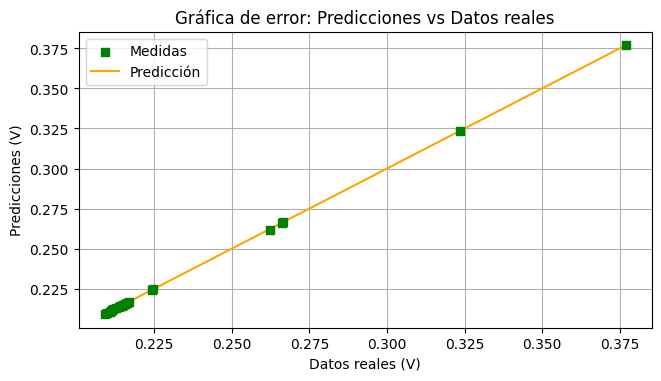

In [ ]:
fig2, ax2 = plt.subplots(1, figsize=(6.5, 3.7), layout='constrained')

ax2.scatter(y, y_pred, color='green', marker='s',label='Medidas', zorder=4)
ax2.plot([min(y), max(y)], [min(y), max(y)], color='orange', label='Predicción', zorder=3) 
ax2.set_xlabel('Datos reales (V)')
ax2.set_ylabel('Predicciones (V)')
ax2.set_title('Gráfica de error: Predicciones vs Datos reales de voltaje')

ax2.legend()
ax2.grid()

plt.show()

In [27]:
print(f'La pendiente de la recta es: {slope} y el intercepto con el eje de las ordenadas {intercept} con un R² de {r2} y un MSE de {mse}')
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'La pendiente de la recta es: {slope_scr} y el intercepto con el eje de las ordenadas {intercept_scr} con un R² de {r2_scr}, y un MSE de {mse_scr} (solo tornillos)')

La pendiente de la recta es: 8.11459153200616e-05 y el intercepto con el eje de las ordenadas 0.2092898028863409 con un R² de 0.9999840688704235 y un MSE de 2.758480056434281e-08
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
La pendiente de la recta es: 8.194662627580717e-05 y el intercepto con el eje de las ordenadas 0.20925662038343307 con un R² de 0.9945849536183736, y un MSE de 2.5729397427960616e-08 (solo tornillos)
